In [42]:
import pandas as pd 
import scipy.stats as stats 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [87]:
train_data = pd.read_csv('immuno_data_train_IEDB_A0201_2_csv.csv')

In [34]:
df = pd.read_csv("/gpfs/ysm/home/kbg32/devrelso/immuno20.csv")
del df['Unnamed: 0']
df = df[df['model'] == 'rank1']
df

,0,1,2,3,4,5,6,7,8,9,...,287,288,289,290,291,feature,model,peptide,292,293
0,0.250000,1.370908,2.221943,4.028036,5.521755,7.720644,10.735896,12.039021,11.368958,13.356684,...,15.271031,16.426683,15.327503,15.994040,16.785450,PAE,rank1,SLILVSQYT,NaN,NaN
1,1.204301,0.250000,0.850878,1.170187,2.106192,2.497375,3.785062,3.697212,4.563546,4.567071,...,11.625619,12.179590,12.764500,13.303326,13.538523,PAE,rank1,SLILVSQYT,NaN,NaN
2,1.216751,0.773963,0.250000,0.770590,0.974524,1.180772,1.358976,1.690646,1.910812,2.271920,...,10.022556,10.320602,10.162027,11.017559,12.916265,PAE,rank1,SLILVSQYT,NaN,NaN
3,1.704348,1.045373,0.767249,0.250000,0.764506,0.951651,1.140886,1.483099,1.589463,1.912604,...,9.620451,9.782520,9.866689,10.748778,11.809044,PAE,rank1,SLILVSQYT,NaN,NaN
4,1.956041,1.224403,0.935581,0.760383,0.250000,0.771068,0.885008,1.086260,1.246343,1.545606,...,8.954847,9.230341,9.819554,9.348233,11.648754,PAE,rank1,SLILVSQYT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55281,81.843173,93.532730,96.741869,97.849692,98.279268,98.301631,98.466261,98.500570,98.619908,98.538853,...,46.254253,40.485770,37.616431,45.156022,41.801658,plddt,rank1,VLILLLLIYL,35.739931,NaN
55284,82.013331,93.525611,96.713183,97.787985,98.095490,98.037359,98.055510,98.235938,98.135502,98.389943,...,50.584867,48.152567,48.544244,68.528450,82.291410,plddt,rank1,FLSEHPNVTL,88.613373,NaN
55287,82.729843,93.713927,96.795699,97.862998,98.206183,98.184590,98.307714,98.339961,98.238865,98.203923,...,46.609003,46.800438,38.134598,42.361199,38.745491,plddt,rank1,YLESFCEDV,NaN,NaN
55290,82.564340,93.692698,96.794007,97.888626,98.279153,98.287031,98.460373,98.466948,98.551400,98.319754,...,41.872975,34.785733,36.348226,38.554758,32.775102,plddt,rank1,LMIFISSFL,NaN,NaN


In [86]:
distance_list = []

for peptide in df['peptide'].unique().tolist():
    #print(peptide)
    df_small = df[df['peptide'] == peptide]
    df_small = df_small[df_small['feature'] == 'distances']
    df_small = df_small.iloc[:,283:292]
    #print(df_small.values.sum())
    distance_list.append(df_small.values.sum())
    #plt.figure()
    #plt.figure(figsize = (3,1))
    #sns.heatmap(df_small)


Text(0.5, 1.0, 'NetMHC Presentation Scores vs predicted peptide-MHC distances')

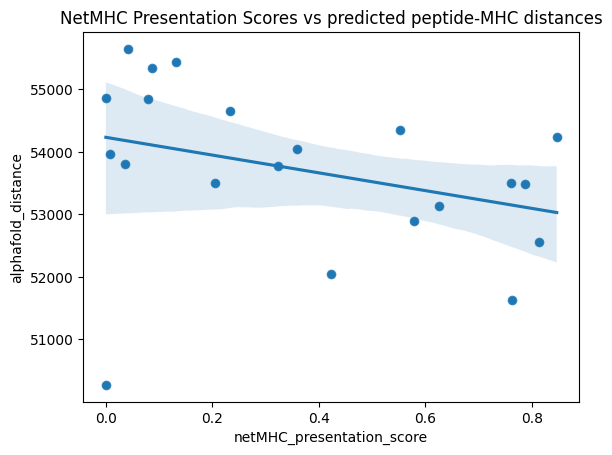

In [85]:
framer = pd.DataFrame()
plot_df = framer.append(train_data[:21]['enrichment'].tolist())
plot_df.columns = ['netMHC_presentation_score']
plot_df['alphafold_distance'] = distance_list
#plt.scatter(train_data[:21]['enrichment'], distance_list)
sns.scatterplot(data=plot_df, x = 'netMHC_presentation_score', y = 'alphafold_distance')
sns.regplot(data=plot_df, x = 'netMHC_presentation_score', y = 'alphafold_distance').set_title('NetMHC Presentation Scores vs predicted peptide-MHC distances')